In [2]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import json
from pprint import pprint

In [4]:
json_path="./data/implementations_no_q.json"
with open(json_path) as f:
    data = json.load(f)

In [8]:
mandelbrot32 = []
mandelbrot64 = []
simd32 = []
simd64 = []

for d in data["datapoints"]:
    avg_time = np.asarray(list(map(lambda x: x["computationTime"],
                   d["data"]["workers"])))
    avg_time = np.sum(avg_time)
    if d["implementation"] == "mandelbrot32":
        mandelbrot32.append(avg_time)
    elif d["implementation"] == "mandelbrot64":
        mandelbrot64.append(avg_time)
    elif d["implementation"] == "mandelbrotsimd32":
        simd32.append(avg_time)
    elif d["implementation"] == "mandelbrotsimd64":
        simd64.append(avg_time)

# time in ms
mandelbrot32 = np.asarray(mandelbrot32) / 1000
mandelbrot64 = np.asarray(mandelbrot64) / 1000
simd32 = np.asarray(simd32) / 1000
simd64 = np.asarray(simd64) / 1000
print(mandelbrot32, mandelbrot64, simd32, simd64)
print(mandelbrot32 / simd32)
print("Speed up at most intensivesed region: " + str(mandelbrot32[3]/simd32[3]))
print("Speed up at least intensivesed region: " + str(mandelbrot32[2]/simd32[2]))
print(np.average(mandelbrot32 / simd32)) # average speed up ~ interesting
print(np.average(mandelbrot32) / np.average(simd32)) # speed up over average comp time ~ uninteresting


[ 3168.08   3136.776  3900.959 14733.635  9085.61   5707.508  3258.383
  3171.063] [ 3187.515  3135.377  3918.291 14851.198  9142.482  5709.643  3266.989
  3164.819] [2662.088 2687.978 3187.067 9831.022 6558.463 4238.563 2725.08  2673.758] [ 9785.173  3750.468  4767.676 19471.777 11730.837  7228.62   3951.981
  3809.547]
[1.19007336 1.16696491 1.22399655 1.49868803 1.3853261  1.34656675
 1.19570178 1.18599477]
Speed up at most intensivesed region: 1.4986880306035322
Speed up at least intensivesed region: 1.2239965460406073
1.2741640300660353
1.3355511116921905


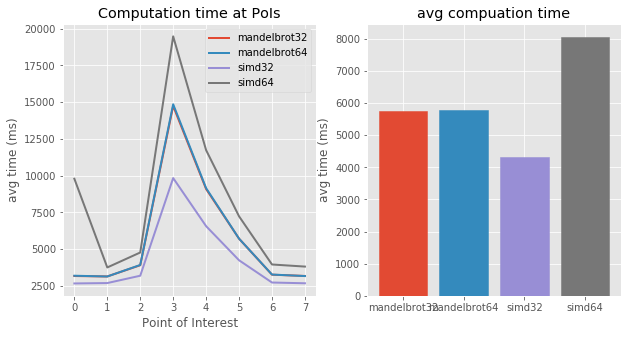

In [9]:
# Data for plotting
x = np.arange(len(simd64))
names = ["mandelbrot32", "mandelbrot64", "simd32", "simd64"]

plt.style.use('ggplot')
fig, (line, bar) = plt.subplots(1, 2, figsize=(10,5))
p0 = line.plot(x, mandelbrot32, label=names[0], lw=2)
p1 = line.plot(x, mandelbrot64, label=names[1], lw=2)
p2 = line.plot(x, simd32, label=names[2], lw=2)
p3 = line.plot(x, simd64, label=names[3], lw=2)
line.legend()

line.set(xlabel='Point of Interest', ylabel='avg time (ms)',
       title='Computation time at PoIs')
line.grid(True)

avg = np.asarray([np.average(mandelbrot32), np.average(mandelbrot64), np.average(simd32), np.average(simd64)])
x_avg = np.arange(len(avg))

barlist = bar.bar(x_avg, avg)
# set colors of bars to match colors in line plot
barlist[0].set_color(p0[0].get_color())
barlist[1].set_color(p1[0].get_color())
barlist[2].set_color(p2[0].get_color())
barlist[3].set_color(p3[0].get_color())

bar.set_xticks(x_avg)
bar.set_xticklabels(names)
bar.set(ylabel="avg time (ms)",
       title="avg compuation time")
bar.grid(True)

# fig.savefig("impl_test.svg", format="svg")
plt.show()

NameError: name 'mandelbrot32' is not defined